In [2]:
# colab 사용 시! Local PC로 실습하는 경우 실행 x / 단, 작업경로를 2025_LGE_DNN으로 맞춰주기

!git clone https://github.com/Im-JihyunKim/2025_LGE_DNN.git
%cd /content/2025_LGE_DNN

Cloning into '2025_LGE_DNN'...
remote: Enumerating objects: 431, done.
remote: Total 431 (delta 0), reused 0 (delta 0), pack-reused 431 (from 2)
Receiving objects: 100% (431/431), 108.10 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (385/385), done.
/content/2025_LGE_DNN


In [3]:
from IPython.display import Image

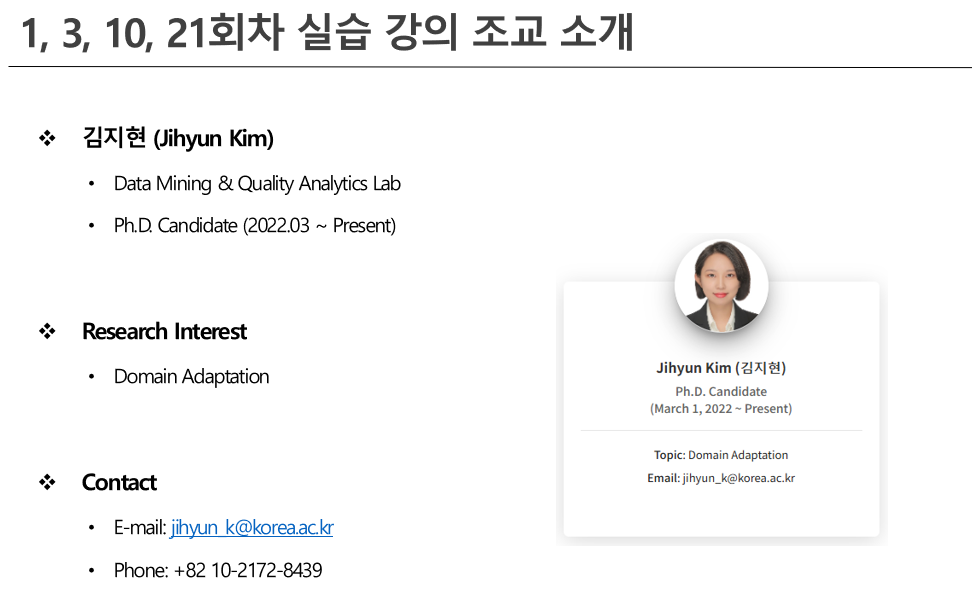

In [4]:
Image('images/img0.png')

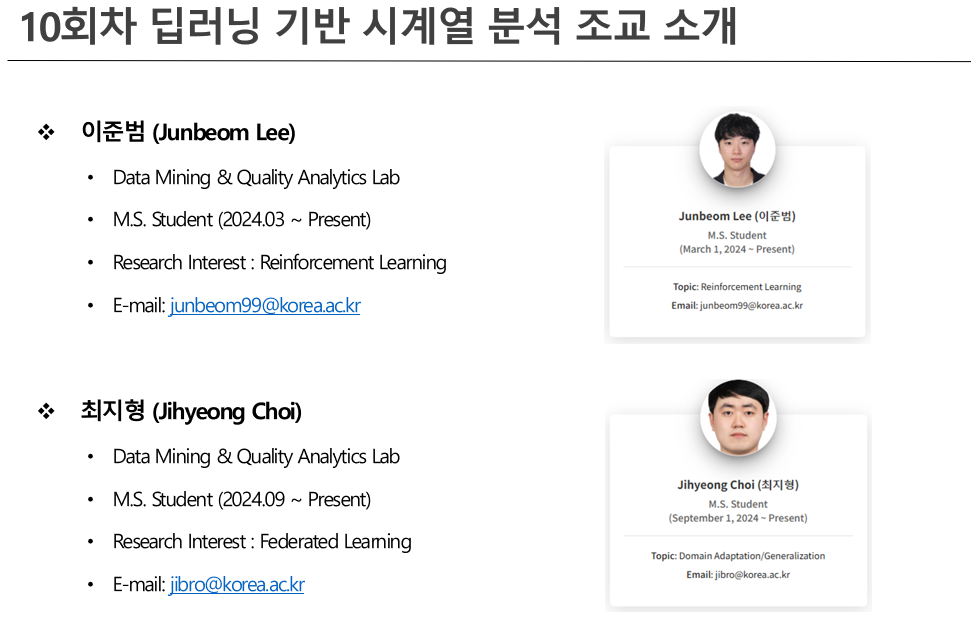

In [5]:
Image('images/img00.PNG')

## PyTorch 기초 Tutorial: Tensor Manipulation

In [6]:
import torch
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
# torch.tensor를 통한 벡터 생성 (torch.tensor()는 일반적으로 list 내지는 array를 입력으로 받는 함수)

print(f'pytorch tensor : {torch.tensor([1, 2, 3, 4, 5]).dtype}')           # dtype (데이터 자료형) - 64비트 정수  #####보통 밑에 있는 type() 사용함
print(f'pytorch tensor : {torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0]).dtype}') # dtype (데이터 자료형) - 32비트 부동 소수점

pytorch tensor : torch.int64
pytorch tensor : torch.float32


In [8]:
a = [1,2,3,4,5]  # type(a) -> list

a_long = torch.LongTensor(a)    # list -> 64비트 "정수" 데이터 타입의 텐서로 변환 ######분류형은 이거 써야함
a_float = torch.FloatTensor(a)  # list -> 32비트 "부동 소수점" 데이터 타입의 텐서로 변환

print(f'pytorch 기본 정수 데이터 타입 {a_long.dtype}   | 텐서 타입 {a_long.type()}') ########정수형(int() 이거 써도 됨)
print(f'pytorch 기본 실수 데이터 타입 {a_float.dtype} | 텐서 타입 {a_float.type()}')
print(f'pytorch 기본 실수 데이터 타입 {a_float.cuda().dtype} | 텐서 타입 {a_float.cuda().type()}')  # cuda (GPU)
# cf. 참고. 텐서 타입: 텐서가 특정 데이터 타입의 데이터를 저장하고 있다는 의미

pytorch 기본 정수 데이터 타입 torch.int64   | 텐서 타입 torch.LongTensor
pytorch 기본 실수 데이터 타입 torch.float32 | 텐서 타입 torch.FloatTensor
pytorch 기본 실수 데이터 타입 torch.float32 | 텐서 타입 torch.cuda.FloatTensor


- cf. 텐서 타입은 `dtype`과 달리 `device` 정보도 포함되어 있으므로 dtype과 device 정보를 한 번에 문자열로 확인 가능
    - device가 CPU면 `torch.FloatTensor`
    - device가 GPU면 `torch.cuda.FloatTensor`

### Datatype 변경 방법
- cf. [`print()` function을 이용할 때, `f-string`을 이용하면 문자열을 쉽게 포맷팅 가능](https://docs.python.org/ko/3/tutorial/inputoutput.html)

In [9]:
a = torch.LongTensor([1,2,3,4,5])  # 정수형 데이터를 담은 1차원 텐서

print(f'변경 전 data type : {a.dtype}')
print(f'변경 후 data type : {a.type(torch.FloatTensor).dtype}')  # Tensor.type(변경할 텐서 타입)  ####여기서는 실수형으로 변경
print(f'변경 후 data type : {a.float().dtype}')                  # Tensor.변경데이터타입()

변경 전 data type : torch.int64
변경 후 data type : torch.float32
변경 후 data type : torch.float32


### Numpy to Tensor & Tensor to Numpy
- numpy (Numerical Python)는 다차원 배열을 생성하고 조작하는데 편리한 기능을 제공해주는 라이브러리

In [10]:
# numpy to tensor
a = np.array([1,2,3,4,5])   # numpy array

print(torch.from_numpy(a).type())   # torch.from_numpy(numpyarray) -> numpyarray를 tensor로 변환
print(torch.tensor(a).type())       # torch.tensor(numpyarray)     -> numpyarray를 tensor로 변환
print(torch.LongTensor(a).type())   # torch.텐서타입(numpyarray)    -> numpyarray를 특정 텐서 타입으로 변환
                                                                    # 32비트 정수형(int)에서 64비트 정수형(long)으로 변환

torch.LongTensor
torch.LongTensor
torch.LongTensor


In [11]:
# tensor to numpy
a_tensor = torch.LongTensor([1,2,3,4,5])  # Tensor
a_numpy  = a_tensor.numpy()               # Tensor.numpy()  -> Tensor를 numpy array로 변환

print(type(a_numpy))

<class 'numpy.ndarray'>


### CPU & GPU
- cf. CUDA(Compute Unified Device Architecture)는 NVIDIA에서 개발한 프로그래밍 모델로, NVIDIA의 GPU를 사용하여 CPU보다 높은 계산 성능을 달성할 수 있게끔 도와주는 tool
- GPU 계산을 가능케 하여, 딥러닝 모델 학습 및 추론에 필요한 computing 성능 가속화 가능

In [12]:
# GPU를 사용할 수 있는지 없는지 확인
torch.cuda.is_available()

True

In [13]:
# tensor의 위치/디바이스 확인
a = torch.FloatTensor([1,2,3,4,5])
a.device

device(type='cpu')

In [14]:
# CPU to GPU
print(a.cuda().device)
print(a.to('cuda').device)
print(a.to(0).device)
print(a.to('cuda:0').device)

cuda:0
cuda:0
cuda:0
cuda:0


In [15]:
# GPU to CPU
a = torch.FloatTensor([1,2,3,4,5]).to(0)
print(f'{a.device} to {a.cpu().device}')       # 방식 1: tensor.cpu()
print(f'{a.device} to {a.to("cpu").device}')   # 방식 2: tensor.to("cpu")

cuda:0 to cpu
cuda:0 to cpu


In [16]:
# 같은 형태의 벡터여도, "동일한 디바이스 상에 있어야 연산" 가능
a = torch.FloatTensor([1,2,3,4,5]).to(0)
a + a.cpu()   ## 본 코드는 에러가 납니다.

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

### (Optional) Index를 활용한 데이터 선택

In [ ]:
# 2차원 tensor 생성
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])

print(a, '\n Tensor a의 형태:', a.shape)  # cf. tensor는 shape 외에도 size() 를 통해서도 데이터 차원 확인 가능능

In [ ]:
# index를 활용한 i번째 행(row) 선택
i=1            # note: 0부터 시작
print(a[i])    # i번째 행을 추출
print(a[i,:])  # a의 [행, 열] 에서 i번째 행을 선택 (cf. : 는 처음부터 끝까지 모두 다 선택하겠다는 의미)

In [ ]:
# index를 활용한 j번째 열(column) 선택
j=1
print(a[j])    # j번째 **행**을 추출
print(a[:,j])  # a의 [행, 열] 에서 j번째 **열**을 선택

In [ ]:
# index를 활용한 i번째 row, j번째 column element 선택
i, j = 2, 1
print(a[i,j])  # a의 [행, 열] 에서 i번째 행과 j번째 열의 **원소**를 선택

In [ ]:
# index를 활용한 i~j-1까지 row or column 선택
i, j = 1, 3
print(a[i:j, :])  # Case 1. a의 [행, 열] 에서 i번째부터 j번째까지의 **행**과 모든 열(:)의 값을 선택
print(a[:, i:j])  # Case 2. a의 [행, 열] 에서 모든 행(:)과 i번째부터 j번째까지의 **열**의 값을 선택

### (Optional) 특정 조건을 만족하는 데이터 선택
e.g. 클래스가 '5'인 데이터만을 선택하기, 데이터 값이 n 이상인 것만 선택하기 등

In [ ]:
# 1. 데이터 생성
x = torch.randn(size=(32,5))         ## 샘플 수 32개, 한 샘플의 차원(변수 개수)은 5인 데이터(2차원 텐서) 생성
y = torch.randint(0, 6, size=(32,))  ## 0에서 5까지의 값(class)를 가지는 출력 변수 32개 생성
"""note: x와 y는 각 샘플이 서로 mapping되는 형태"""

print(y)            # 원본 y 값
print(y==5)         # 원본 y 값 중 y가 5인 데이터만을 고르겠다는 조건(condition)
print((y==5).sum()) # 조건(condition)에 맞는 데이터의 개수 출력

In [ ]:
condition = (y==5)         # y가 5인 데이터만을 고르겠다는 조건 (condition)
print(condition)

print(y[condition])          # y가 5인 데이터만을 condition을 통해 인덱싱하여 출력
print(x[condition])          # y 값이 5를 가지는 x 데이터만을 condition을 통해 인덱싱하여 출력
print(x[condition].size(0))  # y가 5인 x 데이터의 형태 출력 (32개의 샘플 중 몇 개의 샘플이 해당 조건을 충족하는지 확인 가능)

In [ ]:
# 다양한 방식으로 condition을 만들기
print(y==5)
print(torch.where(y==5, True, False))   # y가 5인 데이터의 인덱스를 찾고, True, False로 반환
print(y.eq(5))

In [ ]:
# 두 개 이상의 condition 만들기
print((y>=3) & (y<=5))       # 1st condition인 y>=3 과 2nd condition인 y<=5 을 "모두"(&, and) 만족하는 다중 조건 생성
print(torch.mul(y>=3, y<=5)) # mul (곱하기) 메소드를 통해서도 생성 가능

### (Optional) 특정 조건을 만족하는 데이터 인덱스 얻기

In [ ]:
# 1. 데이터 생성
x = torch.randn(size=(32,5))  ## 샘플 수 32개, 한 샘플의 차원(변수 개수)은 5인 데이터(2차원 텐서) 생성
y = torch.randint(0,6, size=(32,))  ## 0에서 5까지의 값(class)를 가지는 출력 변수 32개 생성
"""note: x와 y는 각 샘플이 서로 mapping되는 형태"""

print(y)  # 전체 y 값 출력
print((y==5).sum())  # y 값이 5인 조건을 충족하는 데이터 개수 세기

condition = (y==5)  # 조건(condition) 지정
print(condition)    # 조건을 만족하는 데이터가 무엇인지 True/False 형태로 출력

In [ ]:
print(torch.nonzero(condition))  # condition에서 True(1, non-zero)인 행의 index를 출력

## Tensor 연산

### 통계량 계산

In [ ]:
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])
a

In [ ]:
# sum, mean, max, min, std
print(torch.sum(a))  # a.sum()
print(torch.mean(a)) # a.mean()
print(torch.std(a))  # a.std()
print(torch.max(a))  # a.max()
print(torch.min(a))  # a.min()

In [ ]:
# 특정 dimension을 기준으로 계산 -> dim=0 : 각 행의 모든 열에 대해 동작 (cf. dim은 numpy array의 axis와 같음)
print(a, '\n')
print(torch.sum(a, dim=0), '\n')
print(torch.mean(a, dim=0), '\n')
print(torch.std(a, dim=0), '\n')
print(torch.max(a, dim=0), '\n') # 최대값과 최대값 인덱스를 같이 반환
print(torch.min(a, dim=0))       # 최소값과 최소값 인덱스를 같이 반환

In [ ]:
# 특정 dimension을 기준으로 계산 -> dim=1 : 각 열의 모든 행에 대해 동작 (cf. dim은 numpy array의 axis와 같음)
print(a, '\n')
print(torch.sum(a, dim=1), '\n')
print(torch.mean(a, dim=1), '\n')
print(torch.std(a, dim=1), '\n')
print(torch.max(a, dim=1), '\n') # 최대값과 최대값 인덱스를 같이 반환
print(torch.min(a, dim=1)) # 최소값과 최소값 인덱스를 같이 반환

### (Optional) Element-wise 연산

In [ ]:
a = torch.FloatTensor([1,2,3,4,5,6])
b = torch.FloatTensor([4,5,6,7,8,9])

In [ ]:
print(f'상수항 더하기 : {a + 1}')
print(f'상수항 곱하기 : {a * 2}')

In [ ]:
print(f'두 텐서 간 element-wise 더하기 : {a + b}')
print(f'두 텐서 간 element-wise 곱하기 : {a * b}')

In [ ]:
print(f'함수를 활용한 element-wise 더하기 : {torch.add(a,1)}')
print(f'함수를 활용한 element-wise 더하기 : {torch.add(a,b)}')
print(f'함수를 활용한 element-wise 곱하기 : {torch.mul(a,2)}')
print(f'함수를 활용한 element-wise 곱하기 : {torch.mul(a,b)}')
# 나누기 = torch.div
# 제곱 = torch.pow
# 지수 = torch.exp
# 로그 = torch.log

In [ ]:
# 특정 dimension만 더하고 싶으면 해당 dimension의 data를 선택한 후 변경
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])

b = torch.FloatTensor([[11,12,13],
                       [14,15,16],
                       [17,18,19]])

a[:,0] = a[:,0] + b[:,0]  # a텐서의 0번째 열(column) 원소 = a텐서의 0번째 열(column) 원소 + b텐서의 0번째 열(column) 원소

print(a)

### (Optional) 벡터/행렬 연산

In [ ]:
# 두 벡터 간 내적 외적
a = torch.tensor([1,2,3,4])
b = torch.tensor([2,3,4,5])

c = torch.dot(a,b)     # 내적
print(c) # tensor(40)

d = torch.outer(a,b)   # 외적
print(d)

In [ ]:
# 벡터, 행렬 전치(transpose)
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])
print(a.t())
print(a.T)

In [ ]:
# 행렬곱
a = torch.randint(1,10, size=(5,4))  # 1~9까지의 값을 가지는 4개 변수의 정수형 텐서를 5개 무작위 생성
b = torch.randint(1,10, size=(6,4))  # 1~9까지의 값을 가지는 4개 변수의 정수형 텐서를 6개 무작위 생성

print(a)
print(b)

In [ ]:
# matmul은 행렬-벡터 간 연산 가능, mm은 행렬-행렬만 지원
c = torch.matmul(a,b.t()) # torch.mm(a,b.T)

print(c)
print(c.shape) # c.size()

### 텐서 결합 및 분해하기

#### torch.cat : 주어진 차원(axis)을 기준으로 텐서들을 이어 붙여(concatenation) 하나의 텐서로 만듦
- 선택한 dimension(행/열)에 따라서 텐서들이 이어 붙여지며, dimension의 크기는 입력 텐서의 차원 크기 합이 됨. 다른 차원의 크기는 변경되지 않음.

In [ ]:
a = torch.FloatTensor([[1,2,3],
                       [4,5,6],
                       [7,8,9]])

b = torch.FloatTensor([[11,12,13],
                       [14,15,16],
                       [17,18,19]])

row_cat = torch.cat((a,b), dim=0)  # 행 단위로 결합 (아래로 쌓기)
col_cat = torch.cat((a,b), dim=1)  # 열 단위로 결합 (옆으로 쌓기)

print(row_cat, row_cat.shape)  # 6, 3
print(col_cat, col_cat.shape)  # 3, 6

#### torch.stack : 주어진 차원(axis)을 기준으로 각각의 텐서들을 쌓아올려(stack) 새로운 차원을 추가하여 하나의 텐서로 만듦
- 모든 입력 텐서가 동일한 크기를 가져야 하며, 결과 텐서의 크기는 입력 텐서 차원에서 1을 추가한 것과 같음
- 즉, 새로운 차원이 추가되는 것이며, 해당 차원의 크기는 입력된 텐서의 개수와 같게 됨

In [ ]:
stack_dim0 = torch.stack((a,b), dim=0)
print(stack_dim0, stack_dim0.shape, '\n')  # 2, 3, 3 -> (3,3) 텐서가 2개

stack_dim1 = torch.stack((a,b),dim=1)
print(stack_dim1, stack_dim1.shape)        # 3, 2, 3 -> (2,3) 텐서가 3개

#### torch.chunk -> tensor 쪼개기
- 텐서를 특정 차원을 기준으로, 특정 수의 조각만큼 균등하게 나눔
- `chunks` 인자의 수만큼 균등하게 나누어 반환됨. 다만 완벽하게 균등하지 않을 경우 마지막 조각이 다른 조각보다 작을 수 있음

In [ ]:
# 하나의 텐서를 n개의 텐서로 분해하기
a = torch.FloatTensor([
    [ 1.,  2.,  3.],
    [ 4.,  5.,  6.],
    [-1., -2., -3.],
    [-4., -5., -6.]
])

print(torch.chunk(a,chunks=4, dim=0))  # 텐서 a를 행(axis=0) 기준으로 4개로 분할(chunk)

#### torch.split -> tensor 분리하기
- 텐서를 지정된 크기로 나눔
- 분리 방식을 `torch.chunk`보다 세밀하게 제어 가능

In [ ]:
# 하나의 텐서를 n개의 row를 가지는 텐서로 분리하기
print(torch.split(a, split_size_or_sections=1, dim=0))  # 텐서 a를 행(axis=0) 기준으로 1개씩 분리
                                                        # `split_size_or_sections` 인자가 리스트나 튜플로 입력될 경우, 지정된 크기의 목록에 따라 텐서를 나눔 -> 조각 크기를 더 정확하고 유연하게 지정 가능

### Tensor 차원 조작

#### Tensor.unsqueeze -> 차원 늘리기

In [17]:
# 데이터 생성
a = torch.randn(size=(10,3))
b = torch.randn(size=(3,))

print(a.shape, b.shape)

torch.Size([10, 3]) torch.Size([3])


In [18]:
# 텐서를 병합하고자 할 때 차원이 다르면 에러 발생 (2차원과 1차원 텐서를 병합하지 못함)
print(torch.cat((a,b), dim=0))

RuntimeError: Tensors must have same number of dimensions: got 2 and 1

In [19]:
print(b.unsqueeze(dim=0).size())  # unsqueeze -> 차원을 **늘리는** 메소드 (dim은 어떤 데이터 차원을 기준으로 늘릴 것인지를 결정해주는 인자)

torch.Size([1, 3])


In [20]:
torch.cat((a,b.unsqueeze(dim=0)), dim=0).shape  # 둘 다 2차원이기 때문에 병합 가능, dim=0으로 cat 하였기 때문에 맨 처음 차원에서 10+1=11로 늘어남.

torch.Size([11, 3])

#### Tensor.squeeze -> 차원 줄이기

In [21]:
# 데이터 생성
a = torch.randn(size=(1,10,3))
b = torch.randn(size=(5,3))

In [22]:
# squeeze()는 차원을 **줄여주는** 메소드. dim 인자로 어떤 차원을 기준으로 축소할 것인지를 결정
torch.cat((a.squeeze(dim=0), b), dim=0).shape  # a를 10, 3 으로 줄였기에 2차원 텐서 간의 cat 가능

torch.Size([15, 3])

#### Tensor.permute -> 차원 재배열
- 텐서의 형태(shape)를 원하는 순서로 자유롭게 변경
- 실제 데이터는 변경하지 않고 차원 순서만 변경하기 때문에 데이터 구조를 유연하게 조작 가능
- CNN, LSTM 등에서 모델에 텐서 형태의 데이터를 입력할 때, 각각 요구하는 형태(shape)가 다른 경우가 있음

In [23]:
# 차원을 여러 개로 변경
images = torch.randn(size=(32,32,3,128))  # width=32, height=3, channel=3 이미지가 128개 있는 상황이라 가정
print(f'{images.shape} -> {images.permute(3,2,0,1).shape}')  # 차원 순서를 교환 (cf. transpose() 함수도 유사한 방식으로 작동하나, 딱 두 개의 차원만 교환 가능. permute()는 모든 차원을 맞교환)

torch.Size([32, 32, 3, 128]) -> torch.Size([128, 3, 32, 32])


#### torch.reshape, torch.view -> 텐서 형태 변경
- `reshape(input, shape)` : `input`은 형태를 변경할 원본 텐서, `shape`은 원하는 새로운 형태를 나타내는 정수의 튜플
    - 원본 데이터를 자동으로 복사하여 요구되는 형태로 변경할 수 있음
- `input.view(shape)` : `input`은 형태를 변경할 원본 텐서, `shape`은 원하는 새로운 형태를 나타내는 정수의 튜플
    - 원본 데이터의 형태를 변경하기에 메모리 사용 측면에서 효율적일 수 있음

In [24]:
# 차원 재배열
image = torch.randn(size=(3,32,32))

print(image.reshape(3, 32*32).shape)
print(image.view(3, 32*32).shape)

torch.Size([3, 1024])
torch.Size([3, 1024])


-------------------

## PyTorch AutoGrad (자동 미분)

- 경사 하강법: 1차 미분계수를 이용하여 함수의 최소값을 찾아내는 알고리즘
- 이 경사 하강법을 이용해서 Cost function (Loss function)을 최소화하는 모델의 파라미터를 찾을 수 있음 (gradient에 따라 파라미터를 반복적으로 업데이트하며 최적화하는 것)
    - 모델의 파라미터에 대해 Cost function의 1차 미분 값(gradient)을 구함. 이는 Cost function이 증가하는 방향을 가리킴
    - 파라미터를 gradient의 반대 방향으로 계속 이동시켜 극값에 이를 때까지, 즉 cost(loss)를 최소화 시킬 수 있는 파라미터를 찾아낼 때까지 최적화
    - cf. 이때 얼마나 이동할 것인지를 결정하는 또 다른 요인으로 학습률(`learning rate`)이 있음
- PyTorch에서는 경사 하강법을 직접 구현할 필요 없이, 미분 계산을 자동화하여 손쉽게 사용 가능

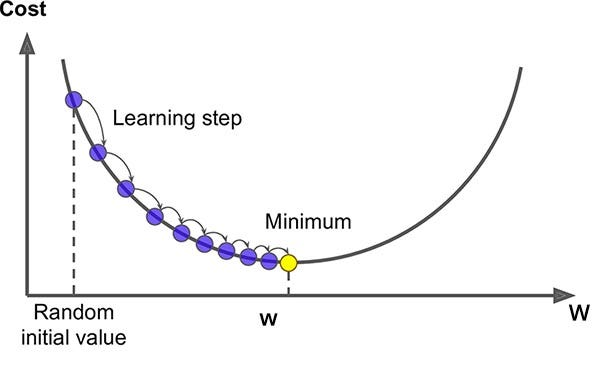

In [25]:
Image('./images/GD.PNG')

In [27]:
# Loss function 정의 #### 그냥 예시용으로 만든거임

def f(w: torch.tensor):
    loss = w**3 + 2*w**2 + 7
    return loss

In [29]:
w = torch.tensor(3.0, requires_grad=True)  # w는 신경망의 파라미터 -> 파라미터에 대한 오류의 기울기를 저장하기 위해 requires_grad=True 옵션 넣어주기

f_w = f(w)
f_w.backward()   # 기울기 계산 후 .grad 속성에 해당 기울기 값들을 저장
print(w,w.grad)    # f_w를 w로 미분한 값

print(w.grad == 3*w**2 + 4*w)  # backward로 수집한 기울기들이 올바른지 직접 확인! (cf. f'(x)=3x**2 + 4x)

tensor(3., requires_grad=True) tensor(39.)
tensor(True)


--------

In [30]:
x = torch.randn(size=(10,20))        # 입력 변수가 20개인 관측치 10 개
y = torch.randn(size=(10,1))         # x에 해당하는 출력 변수

w1 = torch.randn(size=(20,10), requires_grad=True) # linear layer1
w2 = torch.randn(size=(10,1), requires_grad=True)  # linear layer2

w1_x = torch.matmul(x,w1)      # forward - w1^Tx
y_pred = torch.matmul(w1_x,w2) # forward - w2^T(w1^Tx)

def mse_loss_function(y_pred, y_true):
    return (y_true-y_pred)**2

In [31]:
loss = mse_loss_function(y_pred, y)       # MSE Loss 계산
print("MSE loss: ", loss)                 # MSE loss는 관측치마다 계산됨 -> [10, 1] 형태의 텐서.

loss.backward(retain_graph=True) # backward --> error!!! gradient는 하나의 scalar outputs에 대해서만 계산 가능하기 때문!  → 밑에 보면 됨!!!
                                 # (grad can be implicitly created only for scalar outputs)

MSE loss:  tensor([[1.1868e+02],
        [4.0022e+02],
        [1.8982e+02],
        [8.1374e+01],
        [1.6839e+01],
        [8.1772e+01],
        [1.2670e+01],
        [1.0613e+02],
        [5.4272e-04],
        [2.6913e+01]], grad_fn=<PowBackward0>)


RuntimeError: grad can be implicitly created only for scalar outputs

In [32]:
loss = torch.mean(mse_loss_function(y_pred, y))   # MSE Loss 계산! -> 10개 관측치에 대하여 평균을 취해줌!
print("MSE loss: ", loss)                         # 관측치마다 계산된 loss의 평균 값

loss.backward(retain_graph=True)  # backward 가능 (cf. retain_graph는 계산 그래프. 실습을 위해 같은 계산 결과에 대해 여러 번 backward를 수행하기에 그래프 유지 필요)

print(w1.grad.squeeze()[:5,])
print(w2.grad.squeeze())

MSE loss:  tensor(103.4412, grad_fn=<MeanBackward0>)
tensor([[ 14.0721,  -2.4889,  -3.8541,  -7.0445,  -1.0039,  -3.0485,   5.3412,
          -2.4784,  -0.2815,  -5.5254],
        [-42.2275,   7.4687,  11.5655,  21.1392,   3.0126,   9.1481, -16.0278,
           7.4372,   0.8446,  16.5807],
        [ -9.3167,   1.6478,   2.5517,   4.6640,   0.6647,   2.0184,  -3.5363,
           1.6409,   0.1864,   3.6582],
        [ -8.7163,   1.5416,   2.3873,   4.3634,   0.6219,   1.8883,  -3.3084,
           1.5351,   0.1743,   3.4225],
        [ -6.7613,   1.1959,   1.8518,   3.3847,   0.4824,   1.4648,  -2.5663,
           1.1908,   0.1352,   2.6548]])
tensor([-68.1930,  28.3830,  -3.9203,   4.2449,  19.1823, -47.0563,  25.6498,
         39.7576,   1.8087,  43.8413])


### zero_grad()
- backward를 통해 계산된 gradients는 매 역전파 시 누적됨
- 따라서 한 번의 학습이 완료 되면 gradients를 0으로 다시 초기화 해주어야 함 (이전 학습 시 저장된 값들이 다음 학습 시에 간섭을 해서 학습이 망가질 수 있기 때문)

In [ ]:
# backward를 통해 계산된 gradient는 backward를 할 때마다 누적
# 따라서 backward를 한 번 한 뒤, 초기화가 필요

loss = torch.mean(mse_loss_function(y_pred, y))   # loss, -> loss function이 매개변수에 대해 어떻게 변하는지를 보고자 함. #### 미분함수 f'(x) = 2(x+1)
print('Loss: ', loss, '\n')
loss.backward(retain_graph=True)            # backward()

print(f"First call\n{w2.grad.squeeze()}")   # w2의 grad 임시 확인
loss.backward(retain_graph=True)

print(f"\nSecond call\n{w2.grad.squeeze()}")
w2.grad.zero_()   ###### zero gradient #######
loss.backward(retain_graph=True)
print(f"\nCall after zeroing gradients\n{w2.grad.squeeze()}")

### stop autograd (test)
- 모델의 성능을 평가하는 Test (Inference) 단계에서는 역전파(backward)를 통한 파라미터 업데이트가 불필요
- Test 단계 외에도 backward를 위한 computation graph를 만드는 것은 연산 시간을 늘리기에, 필요없는 구간에서는 자동 미분을 끔

In [33]:
with torch.no_grad():
    loss = torch.mean(mse_loss_function(y_pred, y))

print(y_pred.squeeze())
print(loss)

tensor([ -9.5026, -19.9338, -14.7593,  -8.8635,  -4.5045,  -7.2691,   2.3471,
         10.4894,   0.4432,   4.9106], grad_fn=<SqueezeBackward0>)
tensor(103.4412)
